## 💡 WHAT ARE THE MOST IN-DEMAND SKILLS FOR THE TOP THREE MOST POPULAR DATA ROLES IN THE UNITED STATES?

* STEPS: 
    1. Import all necessary libraries, datasets 
    2. Clean up data
    3. Find 3 most popular data roles using value counts 
    4. Find most demanded skills for 3 roles using `.groupby()`
    5. Plot the data using a bar chart 

## Step 1: Import all necessary libraries, datasets 

In [2]:
#Import 
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

#Load datasets 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

## Step 2: Data Cleanup 

Checking through the dataframe, we can see that the `job_posted_date` and `job_skills` columns are formatted as a strings. This means that we cannot access the data efficiently. Therefore, it is necessary to 'clean up the data' by coverting those columns to their correct format. 

In [ ]:
#Check the type of the column 
type(df['job_posted_date'].iloc[1])

str

In [ ]:
#Clean up the data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

After cleaning up, we can access each component of the `job_posted_date` and the `job_skills` column like below

In [5]:
print(f"Month: {df['job_posted_date'].iloc[1].month}")
print(f"Year: {df['job_posted_date'].iloc[1].year}")
print(f"Day: {df['job_posted_date'].iloc[1].day}")

Month: 1
Year: 2023
Day: 14


In [6]:
df['job_skills'].iloc[1][1]

'python'

## Step 3: Find the 3 most popular data roles 

Filter the data for the market of the United States.

In [7]:
df_US = df[df['job_country'] == 'United States']

Expand the `job_skills` column so each skill appears in its own row. This allows us to analyze the distribution of skills across different data job titles.

In [8]:
df_exploded = df_US.explode(column='job_skills')

In [27]:
df_US['job_title_short'].value_counts()

job_title_short
Data Analyst                 67816
Data Scientist               58830
Data Engineer                35080
Senior Data Scientist        12946
Senior Data Analyst          11791
Senior Data Engineer          9289
Business Analyst              7382
Software Engineer             1814
Machine Learning Engineer      921
Cloud Engineer                 423
Name: count, dtype: int64

As we can see, top 3 most popular data roles include: Data Analyst, Data Scientist, Data Engineer

## Step 4: Find most in-demand skills for those top 3 roles 

Create a dataframe that counts the number of time each skills appear in those top 3 roles. This can be done using the `.groupby()` function. 

In [14]:
job_roles = ['Data Analyst','Data Engineer', 'Data Scientist'] 
df_skills_job = df_exploded.groupby(['job_skills','job_title_short']).agg('size').reset_index(name='count')

df_data = df_skills_job.sort_values(by='count',ascending=False).copy()
df_data

,job_skills,job_title_short,count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


From the above dataframe, we can determine the most common skills for each job title. To make the data easier to understand, I will present the findings as the percentage of job postings that mention each skill. 

This can be done by dividing the `count` column in the `df_data` by the amount of job postings in `df`, the original dataframe.

In [20]:
df_job_count = df_US['job_title_short'].value_counts().reset_index(name='count')
df_job_count

,job_title_short,count
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [21]:
df_total = pd.merge(df_data,df_job_count,on='job_title_short',how='left')
df_total.rename(columns={'count_x':'skill_count','count_y':'job_count'},inplace=True)

df_total

,job_skills,job_title_short,skill_count,job_count
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [22]:
df_total['skill_perc'] = 100 * df_total['skill_count'] / df_total['job_count'] 

In [23]:
df_total

,job_skills,job_title_short,skill_count,job_count,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


Now that we have the percentage of job postings that mention each skill. We can begin to plot the figures using bar charts. 

## Step 5: Plot the dataframe into a visualization 

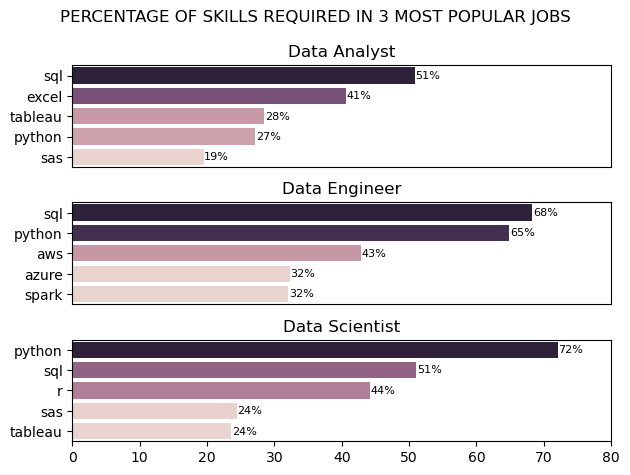

In [28]:
import seaborn as sns 

fig, ax = plt.subplots(3,1) 

for i,job in enumerate(job_roles):
    df_plot = df_total[df_total['job_title_short'] == job].head(5) 
    sns.barplot(df_plot,x='skill_perc',y='job_skills',hue='skill_perc',ax=ax[i]) 
    ax[i].set(title=job, ylabel='', xlabel='')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)
    
    # label the percentage on the bars
    for j, value in enumerate(df_plot['skill_perc']): 
        ax[i].text(value + 0.1, j, f'{value:.0f}%', va='center',fontsize=8) 

    if i != 2: 
        ax[i].xaxis.set_visible(False)

fig.suptitle('PERCENTAGE OF SKILLS REQUIRED IN 3 MOST POPULAR JOBS')

plt.tight_layout()